<a href="https://colab.research.google.com/github/mcx3/avocado/blob/master/Final_Project_Avocados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


First I am uploading the dataset I found from kaggle and naming it as df, I will also rename some of the column names to make it easier to work with and more consistent.

In [0]:
url = "https://raw.githubusercontent.com/mcx3/avocado/master/avocado.csv"
df = pd.read_csv(url).rename(columns = {"AveragePrice":"Avg_price", "Total Volume": "Volume", "Total Bags":"Total_bags", "Small Bags":"Small_bags", "Large Bags": "Large_bags", "XLarge Bags":"XL_bags", "type":"Type", "year": "Year", "region":"Region"})
df

,Unnamed: 0,Date,Avg_price,Volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,XL_bags,Type,Year,Region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The dataset has 14 columns, it includes the average price per unit, the volume of avocados sold, 3 different PLU's (the code on produce in grocery stores), total number of bags sold, total number of small, large, and extra large bags sold, the type of avocado, the year, and the region. 

Since the Unnamed: 0 and Date columns are not relevant to the analysis that I will be doing, I am going to drop those columns from the dataset and rename that dataset "avocado"

In [0]:
avocado = df.drop(columns = ["Unnamed: 0", "Date"])
avocado

,Avg_price,Volume,4046,4225,4770,Total_bags,Small_bags,Large_bags,XL_bags,Type,Year,Region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


First, I need to check how many null values are in each of my columns. 

In [0]:
avocado.isnull().sum()

Avg_price     0
Volume        0
4046          0
4225          0
4770          0
Total_bags    0
Small_bags    0
Large_bags    0
XL_bags       0
Type          0
Year          0
Region        0
dtype: int64

Fortunately for me, I do not have any null values so I can go on to my analysis. 

Now, I am going to create a pairplot using seaborn in order to see which relationships stand out to me immediately. 

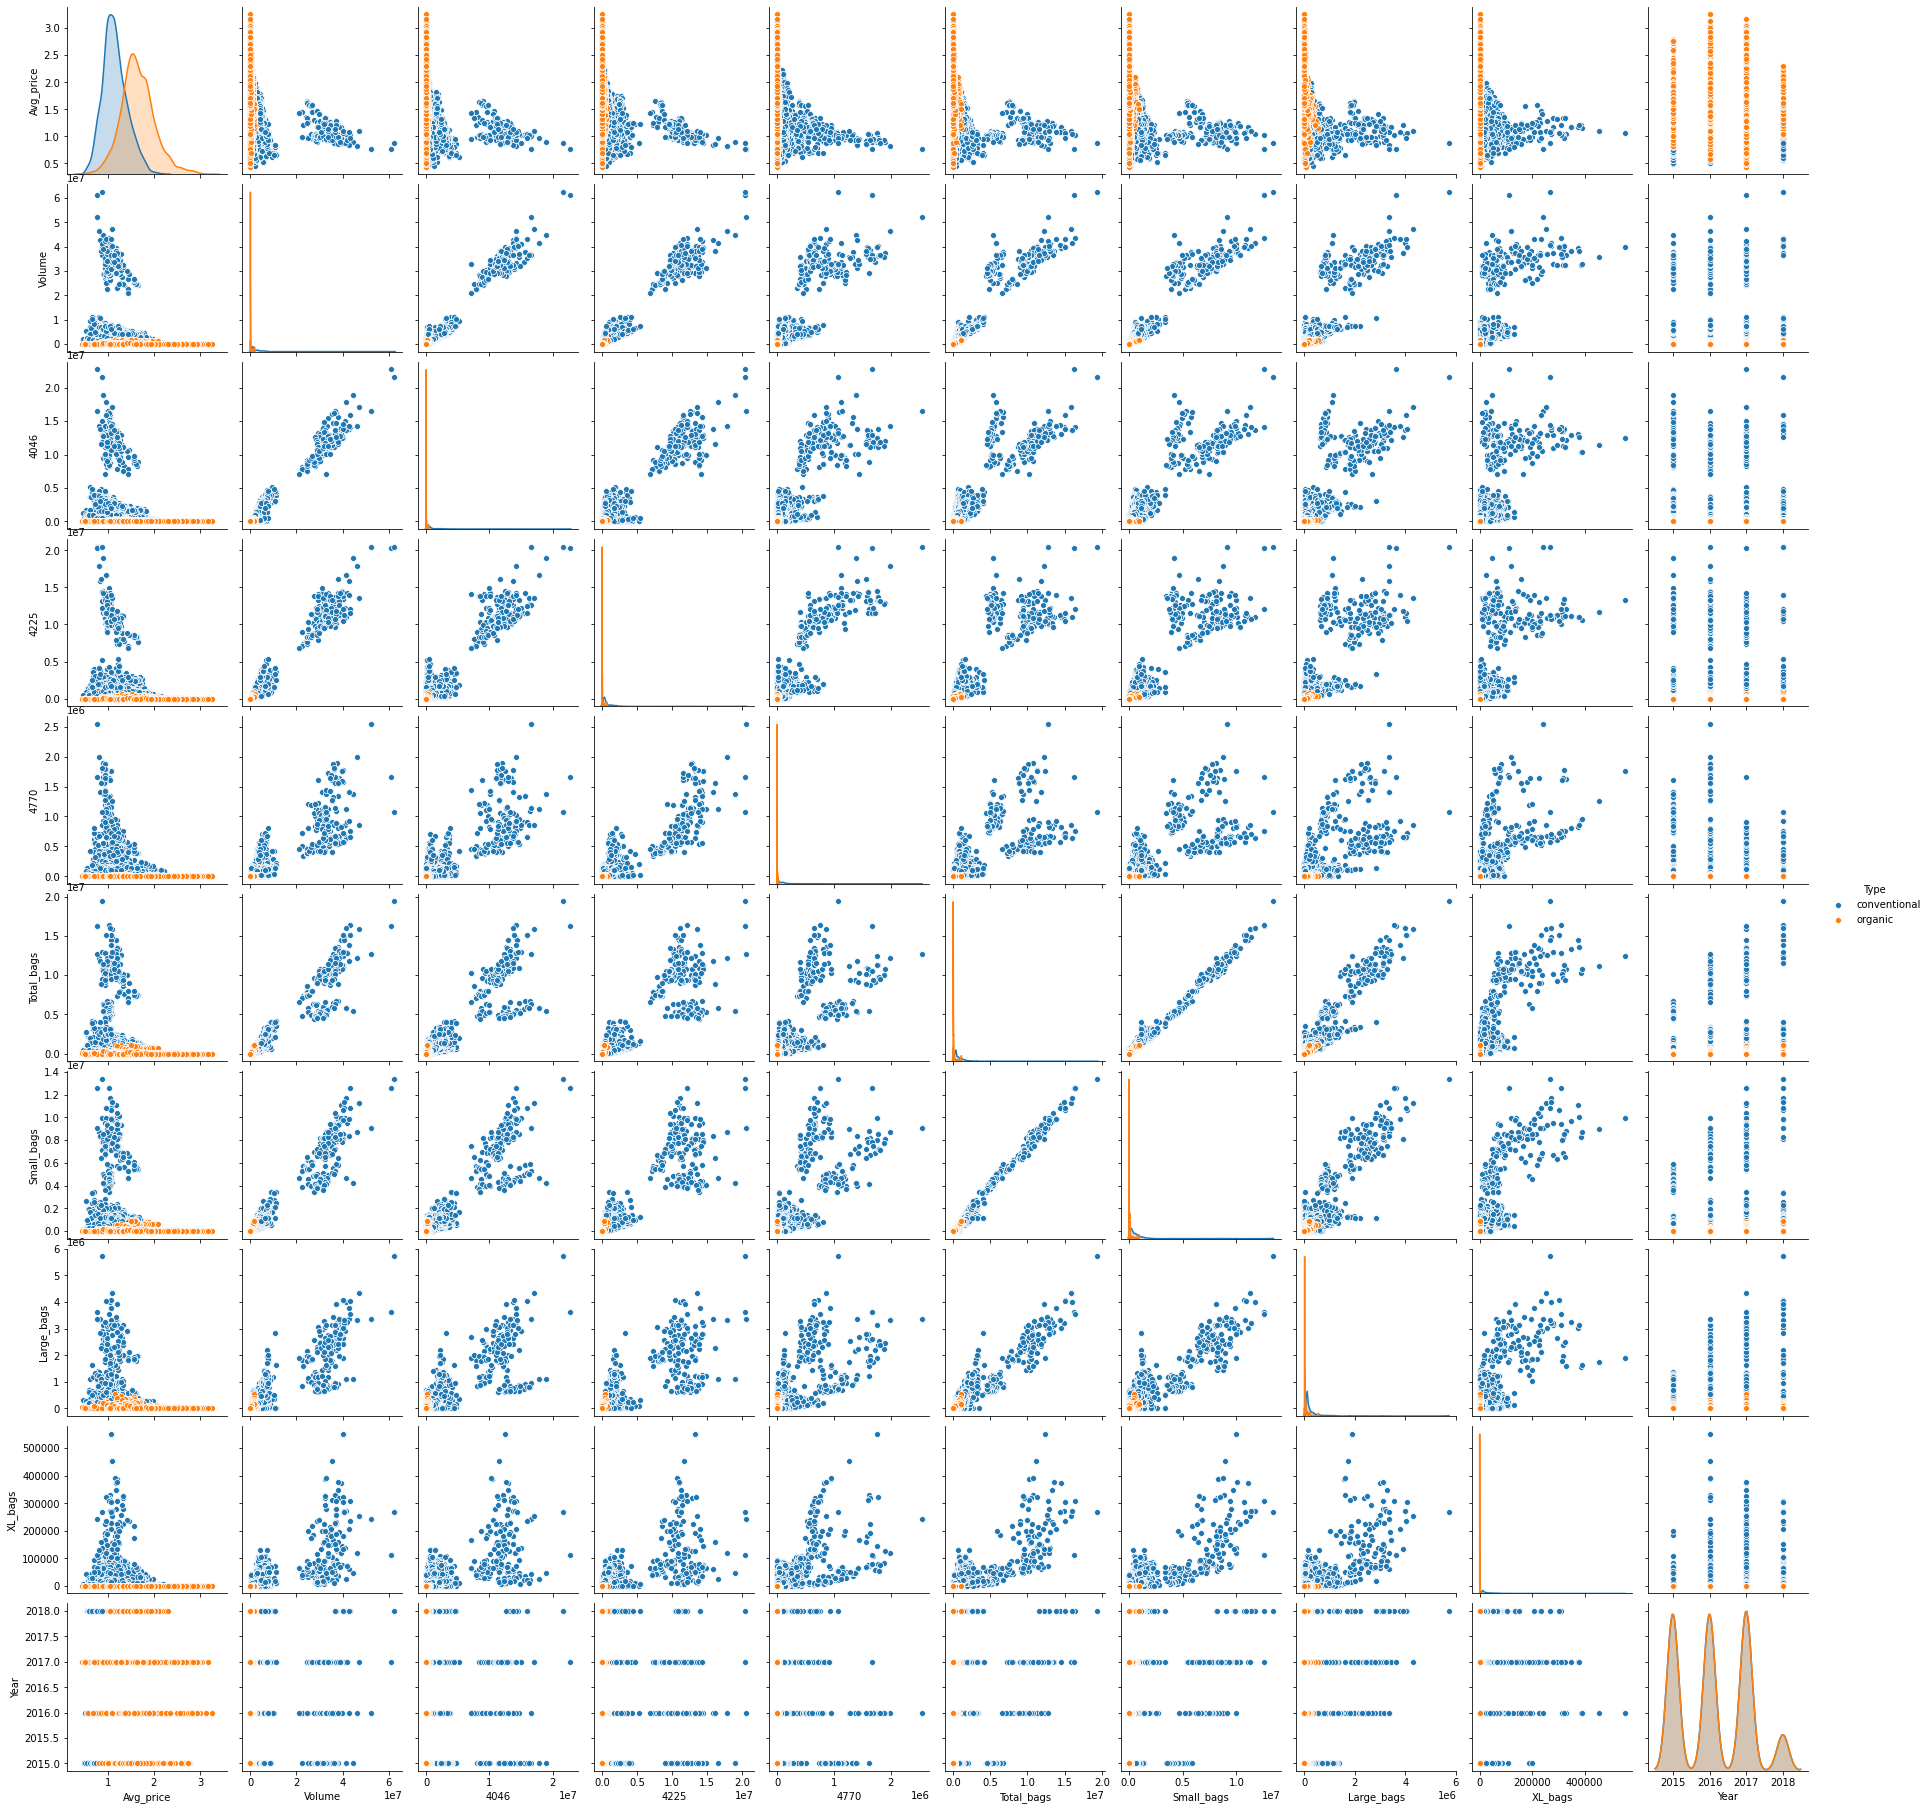

In [0]:
sns.pairplot(avocado, hue = "Type")

# This leads me to the main questions that I will be focusing on:
## **Where should most of the supply of avocados go/which kind is most preferable for consumers in order to maximize profit?**

By knowing this informaion it can be useful for those who produce the avocado crop so they know which crop to produce more of. If there is a high demand for a certain type of avocado, then by providing a high supply they will be able to bring in a higher profit.

This is also useful for suppliers. Knowing which region/state/cities purchase the most amount of avocados is important so that they send a higher supply of avocados to those places, again, in order to increase their profit. 

**Which type of avocado do consumers prefer?**

In [0]:
for r in avocado["Type"].unique():
  print(r)

conventional
organic


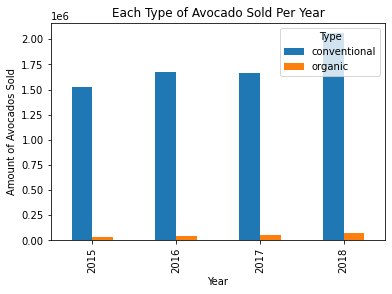

Type,conventional,organic
Year,,
2015,1.530128e+06,31659.931012
2016,1.670317e+06,46524.244580
2017,1.665327e+06,58790.176864
2018,2.058960e+06,74895.480139


In [0]:
avocado.pivot_table(index = "Year", columns = "Type", values = "Volume").plot.bar()
plt.xlabel("Year")
plt.ylabel("Amount of Avocados Sold")
plt.title("Each Type of Avocado Sold Per Year")
plt.show()
print()
avocado.pivot_table(index = "Year", columns = "Type", values = "Volume")

Consumers tend to purchase more conventional avocados, meaning there is a preference for them. 

Now I want to see if price is the reason they are purchasing more conventional avocados. **Is there a relationship between price and volume sold?**

In [0]:
avocado.pivot_table(index = "Year", columns = "Type", values = ["Avg_price", "Volume"])

Avg_price                  Volume              
Type conventional   organic  conventional       organic
Year                                                   
2015     1.077963  1.673324  1.530128e+06  31659.931012
2016     1.105595  1.571684  1.670317e+06  46524.244580
2017     1.294888  1.735521  1.665327e+06  58790.176864
2018     1.127886  1.567176  2.058960e+06  74895.480139

Simply looking at the pivot table, the average price does not seem to impact the number of avocados sold because the price rose for conventional in 2016 as did the volume sold. Comparing the number of conventional avocados sold in 2016 to 2018, the price is higher in 2018 and the number sold.

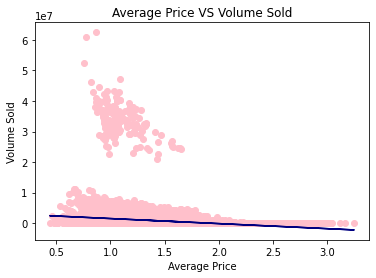


P Value:  2.9416836520796394e-152
R Squared:  0.037153482753071725


In [0]:
result = stats.linregress(avocado["Avg_price"], avocado["Volume"])

plt.scatter(avocado["Avg_price"], avocado["Volume"], c = "pink")
plt.plot(avocado["Avg_price"], result.intercept + result.slope*avocado["Avg_price"], color = "navy")
plt.xlabel("Average Price")
plt.ylabel("Volume Sold")
plt.title("Average Price VS Volume Sold")
plt.show()

print()

print("P Value: ", result.pvalue)
print("R Squared: ", result.rvalue ** 2)

Since the p value is extremely small it means that the relationship is statistically significant. However, the R squared value is fairly small, which means that 3.71% of the amount of avocados sold is effected by the price. So there is a minimal, but statistically significant relationship between price and volume sold. 

**Conventional**

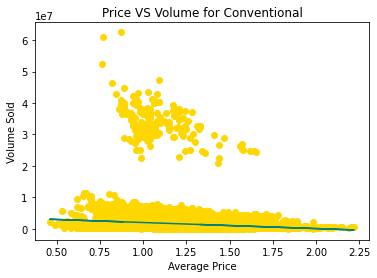


P Value:  1.329846473993772e-24
R Squared:  0.01142449750228444


In [0]:
cond = avocado["Type"] == "conventional"

result = stats.linregress(avocado[cond]["Avg_price"], avocado[cond]["Volume"])

plt.scatter(avocado[cond]["Avg_price"], avocado[cond]["Volume"], color = "gold")
plt.plot(avocado[cond]["Avg_price"], result.intercept + result.slope*avocado[cond]["Avg_price"], color = "teal")
plt.xlabel("Average Price")
plt.ylabel("Volume Sold")
plt.title("Price VS Volume for Conventional")
plt.show()

print()

print("P Value: ", result.pvalue)
print("R Squared: ", result.rvalue ** 2)

**Organic**

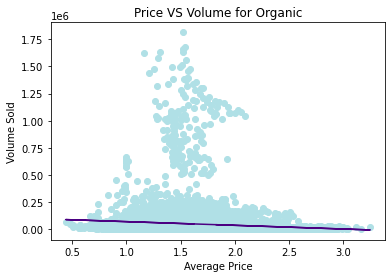


P Value:  1.2917064167062004e-16
R Squared:  0.0074785753973447885


In [0]:
cond = avocado["Type"] == "organic"

result = stats.linregress(avocado[cond]["Avg_price"], avocado[cond]["Volume"])

plt.scatter(avocado[cond]["Avg_price"], avocado[cond]["Volume"], color = "powderblue")
plt.plot(avocado[cond]["Avg_price"], result.intercept + result.slope*avocado[cond]["Avg_price"], color = "indigo")
plt.xlabel("Average Price")
plt.ylabel("Volume Sold")
plt.title("Price VS Volume for Organic")
plt.show()

print()

print("P Value: ", result.pvalue)
print("R Squared: ", result.rvalue ** 2)

In [0]:
avocado.corr()["Avg_price"]["Volume"]

-0.19275238715271953

I found that the P Value for organic and conventional were both low, though the P value for conventional avocados was much lower. This means that both of these relationships are statistically significant. The R Squared value for organic avocados is .0075, a very low number, meaning that the fluctuation in volume sold is 0.75% due to price. The R Squared value for conventional avocados is 0.0114, another very low R Squared value. This means that the fluctuation of volume of conventional avocados sold is 1.14% due to price. 
Also, when I used the correlation command the correlation between average price and volume was -0.193, indicating an inverse relationship. So as the price goes up, volume sold will go down and vice versa. However, since the correlation number is still fairly close to 0 it is not a very strong correlation.
Taking these into account, it is evident that though the relationship is significant,  there is a very minimal, but inverse, relationship between the price and number of avocados sold. 


Next, I wanted to see which PLU is most preferred by consumers.

**Which avocado out of the 3 PLUs listed sold the most?**

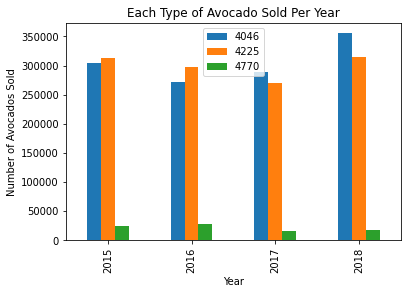

,4046,4225,4770
Year,,,
2015,304443.451708,313633.844367,25426.962520
2016,271567.466578,297850.478632,28468.633371
2017,288716.905194,269964.124350,15941.542779
2018,355323.868904,314628.606698,17694.903387


In [0]:
avocado.pivot_table(index = "Year", values = ["4046", "4225", "4770"]).plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of Avocados Sold")
plt.title("Each Type of Avocado Sold Per Year")
plt.show()

print()

avocado.pivot_table(index = "Year", values = ["4046", "4225", "4770"])

Based off of the visualization and numbers, avocados with a PLU of 4046 (or small hass avocados) and 4225 (large hass avocados) are most frequently bought, the avocado with a PLU of 4770 (extra large hass avocados)  is the least preferred out of all three of them. 


Now I wanted to look into whether price has anything to do with the PLU that was preferred by consumers.

**Did price have anything to do with the PLU of the avocado sold?**

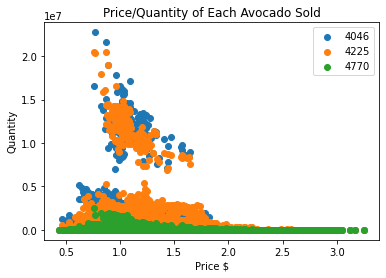

In [0]:
plt.scatter(avocado["Avg_price"], avocado["4046"], label = "4046")
plt.scatter(avocado["Avg_price"], avocado["4225"], label = "4225")
plt.scatter(avocado["Avg_price"], avocado["4770"], label = "4770")
plt.xlabel("Price $")
plt.ylabel("Quantity")
plt.title("Price/Quantity of Each Avocado Sold")
plt.legend()
plt.show()

Simply looking at the scatter plot it looks like the most amount of avocados were sold when the unit price was between  $0.75 and $1.50 and with PLU of 4046 and 4225, which correlates with the amount of avocados sold in the bar graph. 

Now I will conduct linear regression for each avocado PLU to see if there is actually a relationship between the price and each kind of avocado sold.

**4046: Small Hass Avocados**

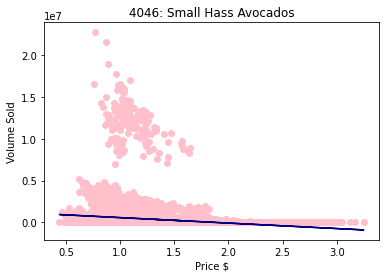


P Value:  4.5949342992876216e-178
R Squared:  0.04339599269070371


In [0]:
result = stats.linregress(avocado["Avg_price"], avocado["4046"])
plt.scatter(avocado["Avg_price"], avocado["4046"], c = "pink")
plt.plot(avocado["Avg_price"], result.intercept + result.slope*avocado["Avg_price"], color = "navy")
plt.xlabel("Price $")
plt.ylabel("Volume Sold")
plt.title("4046: Small Hass Avocados")
plt.show()

print()

print("P Value: ", result.pvalue)
print("R Squared: ", result.rvalue ** 2)

Since the P value is extremely small, it means that the relationship is statistically significant. However, the R Squared value means that only 4.34% of the variation in volume sold of avocados with a PLU of 4046 can be explained by price.

**4225: Large Hass Avocados**

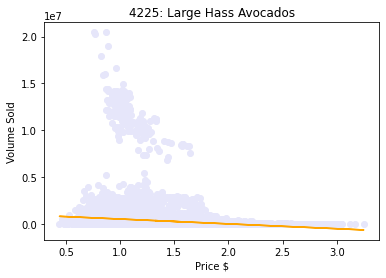


P Value:  1.7245971926802822e-122
R Squared:  0.029904014505040443


In [0]:
result = stats.linregress(avocado["Avg_price"], avocado["4225"])
plt.scatter(avocado["Avg_price"], avocado["4225"], c = "lavender")
plt.plot(avocado["Avg_price"], result.intercept + result.slope*avocado["Avg_price"], color = "orange")
plt.xlabel("Price $")
plt.ylabel("Volume Sold")
plt.title("4225: Large Hass Avocados")
plt.show()

print()

print("P Value: ", result.pvalue)
print("R Squared: ", result.rvalue ** 2)

The P value is extremely small which means that the relationship is statistically significant, but it is slightly bigger than the P value calculated for PLU 4046. With a PLU of 4225 only 2.99% of the variation in volume can be explained by price. This is smaller than the R Squared for PLU of 4046, calculated earlier.

**4770: Extra Large Hass Avocados**

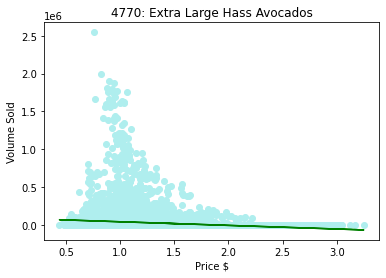


P Value:  6.733646693389568e-132
R Squared:  0.03220086116646296


In [0]:
result = stats.linregress(avocado["Avg_price"], avocado["4770"])
plt.scatter(avocado["Avg_price"], avocado["4770"], c = "paleturquoise")
plt.plot(avocado["Avg_price"], result.intercept + result.slope*avocado["Avg_price"], color = "green")
plt.xlabel("Price $")
plt.ylabel("Volume Sold")
plt.title("4770: Extra Large Hass Avocados")
plt.show()

print()

print("P Value: ", result.pvalue)
print("R Squared: ", result.rvalue ** 2)

The P value is small, meaning that the relationship is statistically significant. However, it is smaller than the P value for 4225 and bigger than 4046. The R Square value is quite small as well, meaning that 3.22% of the variation in volume sold is due to price. This is bigger than the R Squared 4225 but smaller than 4046. 

This means that PLU 4046 has the highest chance of the volume sold being impacted by price, however, it is still a small percent variation.

In [0]:
avocado.corr()["Avg_price"]

Avg_price     1.000000
Volume       -0.192752
4046         -0.208317
4225         -0.172928
4770         -0.179446
Total_bags   -0.177088
Small_bags   -0.174730
Large_bags   -0.172940
XL_bags      -0.117592
Year          0.093197
Name: Avg_price, dtype: float64

I performed linear regression on all 3 of the PLUs with the volume sold in order to see if there was a relationship. 
The P Value for all 3 are significantly low, meaning the relationship for all of them are statistically significant. 
The R Squared value for all 3 are fairly low, though. 
When taking the correlation between average price and the 3 different PLU’s they all had a correlation of around -0.18, also indicating an inverse relationship. PLU 4046 had a correlation of -0.20, the highest out of all 3 of the. Again explaining that 4046 is the most effected by price. 
 
 
So the relationship between price and the different PLUs is minimal, but still exists. 
But, simply looking at the scatter plots, for all 3 it seems like the highest amount of avocados are sold when the unit price is between 75 cents and $1.50. 


Next, I wanted to look into which type of bag consumers prefer to purchase.





>**Do consumers prefer buying small, large, or extra large bags of avocados?**

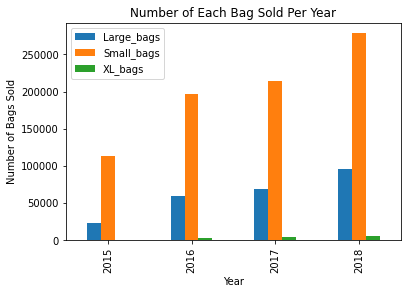

,Large_bags,Small_bags,XL_bags
Year,,,
2015,23520.285037,113033.429256,969.390611
2016,59940.587974,197025.327568,3568.070662
2017,69790.115367,213728.158838,4193.843471
2018,95358.015340,278349.820795,5563.728295


In [0]:
avocado.pivot_table(index = "Year", values = ["Small_bags", "Large_bags", "XL_bags"]).plot.bar()
plt.xlabel("Year")
plt.ylabel("Number of Bags Sold")
plt.title("Number of Each Bag Sold Per Year")
plt.show()

print()

avocado.pivot_table(index = "Year", values = ["Small_bags", "Large_bags", "XL_bags"])

If the consumer tends to prefer one or two kinds and the other kind is barely selling, then it does not make sense to keep them on the shelf. In order to visualize this I created a pivot table with the volume of each type of bag sold each year and then visualized it using a pivot table. 
Per the visualization and numbers, consumers tend to buy small bags the most, followed by large bags. Extra large bags do not sell as well as the other two. 


Next, I wanted to look into which regions were included in the dataset to see how many I would be dealing with. 

In [0]:
for r in avocado["Region"].unique():
  print(r)

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


Here is where things became a little tricky. To my surprise, this column included, regions, states, and cities. This made it difficult to differentiate which states or cities bought the most amount of avocados. 


Since there is no way to separate the cities in the regions column I have to increase the number of rows to view in my groupby so that I can manually pick out the top 5 cities from the top regions that bought the most avocados.

In [0]:
avocado.groupby("Region")["Volume"].mean().sort_values(ascending = False).head(20)

Region
TotalUS                1.735130e+07
West                   3.215323e+06
California             3.044324e+06
SouthCentral           2.991952e+06
Northeast              2.110299e+06
Southeast              1.820232e+06
GreatLakes             1.744505e+06
Midsouth               1.503992e+06
LosAngeles             1.502653e+06
Plains                 9.206761e+05
NewYork                7.122311e+05
DallasFtWorth          6.166251e+05
Houston                6.010884e+05
PhoenixTucson          5.788264e+05
WestTexNewMexico       4.314085e+05
Denver                 4.109542e+05
SanFrancisco           4.018645e+05
BaltimoreWashington    3.985619e+05
Chicago                3.955690e+05
Portland               3.270775e+05
Name: Volume, dtype: float64

Top State: California

Top Region: West

Top 5 Cities: Los Angeles, Dallas, Houston, Phoenix/Tucson, Denver

# **Issue with Dataset:**

The one issue that I found important to be pointed out is that there is no column which tells the reader what the amount supplied was. This becomes problematic because, suppose the supply of organic avocados was low to begin with, then there is no way to tell what the consumer behavior or preference is towards conventional or organic because the supply was low to begin with. 
Due to this, it is difficult to properly claim that the analysis I did in this project accurately portrays consumer behavior. Had there been a column telling me how much supply there was, I would have been able to take the percentage of how much was bought/the supply to see what consumers actually prefer. However, I did the best that I could in my analysis with the information that was provided in the dataset.

# **Recommendation:**

My recommendation is that the company focus on selling primarily conventional, small or large hass avocados, since consumers tend to buy them much more.
In terms of selling them, they should be sold either individually or in small bags and send most of their supply to the West.
By following these terms, it will help in maximizing the amount of profit that the company brings in. 
